<img src="img/viu_logo.png" width="200">

<h1><font color="#113D68" size=6>UNIVERSIDAD INTERNACIONAL DE VALENCIA</font></h1>

<h1><font color="#113D68" size=5>Magister Inteligencia Artificial</font></h1>

<h2><font color="#113D68" size=4>Trabajo - AG4 - Actividad Guiada 4</font></h2>

<h2><font color="#113D68" size=3>Docente - Raúl Reyero Díez</font></h2>

<h2><font color="#113D68" size=3>Cátedra - 03MIAR_10_A_2024-25_Algoritmos de Optimización</font></h2>

<br><br>

<div style="text-align: right">
    <font color="#113D68" size=4>Alumno: Eduardo Osorio Venegas</font><br>
</div>

Colab: https://colab.research.google.com/github/eosovngas/VIU_MUIA_AP_102024/blob/main/EOSORIO_AG4_AlgoritmosOptimizacion/EOSORIO_AG4_AlgoritmosOptimizacion.ipynb <br>
Github: https://github.com/eosovngas/VIU_MUIA_AP_102024/blob/main/EOSORIO_AG4_AlgoritmosOptimizacion/EOSORIO_AG4_AlgoritmosOptimizacion.ipynb
<br>


# Carga de librerias

In [2]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

zsh:1: 0.9 not found


In [5]:
!pip install tsplib95 --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


# Carga de los datos del problema

In [6]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)

# Carga de datos y generación de objeto problem

In [7]:
#objeto problem
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())

In [8]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



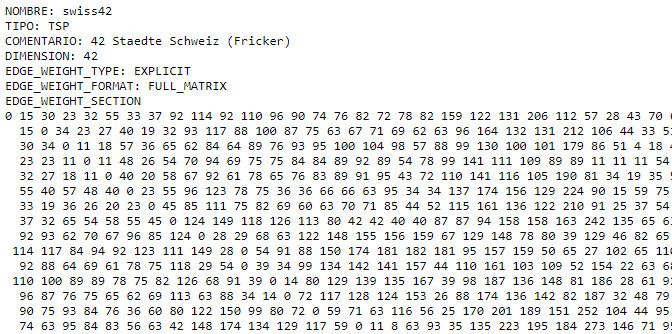

In [10]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

# Funcionas basicas

In [17]:
#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal)
print(distancia_total(sol_temporal, problem))

[0, 1, 24, 6, 13, 20, 15, 5, 8, 31, 10, 36, 12, 35, 34, 38, 14, 23, 16, 37, 3, 11, 25, 40, 27, 7, 26, 21, 9, 2, 29, 41, 28, 19, 18, 4, 32, 33, 22, 17, 30, 39]
4831


# BUSQUEDA ALEATORIA

In [18]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 38, 33, 10, 23, 40, 9, 22, 30, 18, 6, 26, 11, 8, 36, 39, 28, 27, 12, 25, 5, 29, 41, 21, 37, 20, 31, 35, 7, 16, 14, 15, 19, 24, 4, 32, 34, 17, 13, 3, 2, 1]
Distancia     : 3647


# BUSQUEDA LOCAL

In [19]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3647
Distancia Mejor Solucion Local: 3218


In [20]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  25 , la mejor solución encontrada es: [0, 20, 34, 9, 23, 40, 24, 21, 39, 8, 10, 26, 6, 4, 29, 30, 28, 2, 18, 12, 11, 25, 41, 22, 38, 33, 31, 35, 36, 15, 16, 14, 19, 13, 5, 7, 37, 17, 1, 3, 27, 32]
Distancia     : 1902


# SIMULATED ANNEALING


In [21]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [22]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 1, 16, 14, 6, 7, 17, 31, 32, 30, 8, 10, 18, 26, 5, 4, 2, 28, 27, 22, 38, 34, 33, 20, 35, 36, 37, 15, 19, 13, 12, 23, 21, 9, 41, 11, 25, 40, 24, 39, 29, 3]
con una distancia total de 1974


# Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


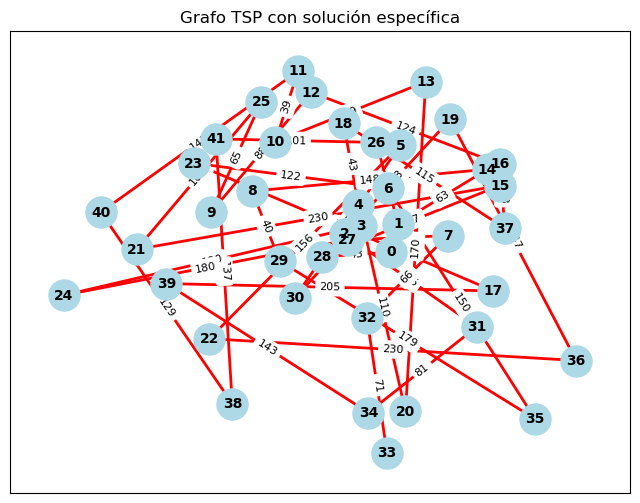

In [24]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

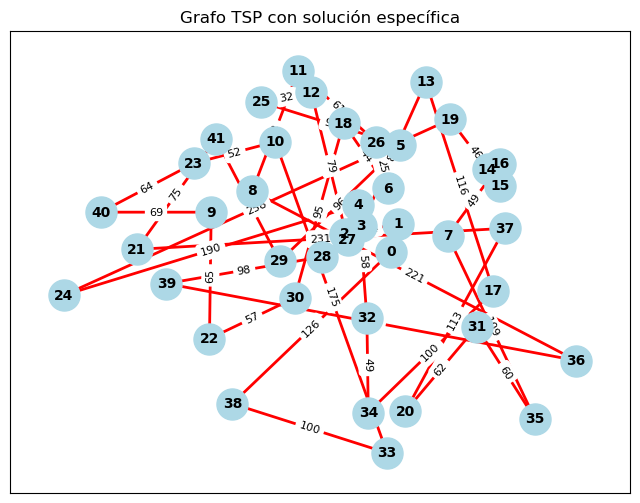

In [25]:
plot_tsp_solution(problem.edge_weights, solucion)

<img src="img/P1.png" width="800">

# Busqueda en entornos variables (VNS)

In [92]:
import random
import math
import tsplib95

# Cargar el problema del TSP
file = "swiss42.tsp"
problem = tsplib95.load(file)
Nodos = list(problem.get_nodes())
solucion_inicial = random.sample(Nodos, len(Nodos))

In [89]:
# Función para calcular la distancia total de una solución
def distancia_total(solucion, problem):
    distancia = 0
    for i in range(len(solucion) - 1):
        distancia += problem.get_weight(solucion[i], solucion[i + 1])
    distancia += problem.get_weight(solucion[-1], solucion[0])  # Regreso al inicio
    return distancia

# Operador 1: Intercambio de dos nodos (Swap)
def swap(solucion):
    i, j = sorted(random.sample(range(1, len(solucion)), 2))
    nueva_solucion = solucion[:]
    nueva_solucion[i], nueva_solucion[j] = nueva_solucion[j], nueva_solucion[i]
    return nueva_solucion

# Operador 2: Inversión de un segmento (2-opt)
def two_opt(solucion):
    i, j = sorted(random.sample(range(1, len(solucion)), 2))
    return solucion[:i] + solucion[i:j+1][::-1] + solucion[j+1:]

# Operador 3: Mueve un nodo a otra posición (Or-Opt)
def or_opt(solucion):
    i, j = sorted(random.sample(range(1, len(solucion)), 2))
    nodo = solucion.pop(i)
    solucion.insert(j, nodo)
    return solucion
    
# Búsqueda en Entornos Variables (VNS)
def vns(solucion, problem, max_iter=1000):
    vecindades = [swap, two_opt, or_opt]
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(mejor_solucion, problem)
    
    iteracion = 0
    while iteracion < max_iter:
        for vecindad in vecindades:
            nueva_solucion = vecindad(mejor_solucion)
            nueva_distancia = distancia_total(nueva_solucion, problem)
            
            if nueva_distancia < mejor_distancia:
                mejor_solucion, mejor_distancia = nueva_solucion, nueva_distancia
                iteracion = 0  # Reiniciar iteraciones si hay mejora
                break  # Cambiar de vecindad si encontramos mejora
        else:
            iteracion += 1  # Aumentamos iteraciones solo si ninguna vecindad mejora
    
    return mejor_solucion, mejor_distancia

In [91]:
# Ejecutar VNS
mejor_solucion, mejor_distancia = vns(solucion_inicial, problem)
print("Mejor ruta encontrada:", mejor_solucion)
print("Distancia total:", mejor_distancia)

Mejor ruta encontrada: [24, 23, 13, 7, 18, 31, 33, 26, 2, 9, 10, 29, 37, 0, 17, 8, 11, 35, 1, 41, 16, 30, 38, 34, 27, 28, 40, 22, 14, 15, 21, 36, 12, 4, 5, 25, 32, 39, 6, 3, 20, 19]
Distancia total: 3543


<img src="img/P2.png" width="800">

# Busqueda local con entornos variables

In [97]:
# Función para calcular la distancia total
def distancia_total(solucion, problem):
    distancia = 0
    for i in range(len(solucion) - 1):
        distancia += problem.get_weight(solucion[i], solucion[i + 1])
    distancia += problem.get_weight(solucion[-1], solucion[0])  # Regreso al inicio
    return distancia

# Operadores de vecindad simples
def swap(solucion):
    i, j = random.sample(range(len(solucion)), 2)
    solucion[i], solucion[j] = solucion[j], solucion[i]
    return solucion

# Búsqueda Local con Entornos Variables
def busqueda_local_vns(solucion, problem, iteraciones=500):
    for _ in range(iteraciones):
        nueva_solucion = swap(solucion[:])
        if distancia_total(nueva_solucion, problem) < distancia_total(solucion, problem):
            solucion = nueva_solucion
    return solucion, distancia_total(solucion, problem)

# Ejecutar búsqueda local con entoros variables VNS
mejor_solucion, mejor_distancia = busqueda_local_vns(solucion_inicial, problem)
print("Mejor ruta encontrada:", mejor_solucion)
print("Distancia total:", mejor_distancia)

Mejor ruta encontrada: [17, 37, 14, 4, 28, 8, 40, 24, 21, 10, 11, 12, 27, 2, 6, 1, 18, 26, 29, 39, 22, 30, 3, 0, 20, 33, 38, 31, 35, 36, 15, 16, 25, 41, 23, 9, 34, 32, 5, 19, 13, 7]
Distancia total: 2415


# Recocido simulado
* ¿Se puede mejorar con otra elección no tan aleatoria (función genera_vecina_aleatorio()) 

In [105]:
# Función para calcular la distancia total de una solución
def distancia_total(solucion, problem):
    distancia = 0
    for i in range(len(solucion) - 1):
        distancia += problem.get_weight(solucion[i], solucion[i + 1])
    distancia += problem.get_weight(solucion[-1], solucion[0])  # Regreso al inicio
    return distancia

# Operadores de vecindad
def swap(solucion):
    i, j = sorted(random.sample(range(len(solucion)), 2))
    nueva_solucion = solucion[:]
    nueva_solucion[i], nueva_solucion[j] = nueva_solucion[j], nueva_solucion[i]
    return nueva_solucion

def two_opt(solucion):
    i, j = sorted(random.sample(range(len(solucion)), 2))
    return solucion[:i] + solucion[i:j+1][::-1] + solucion[j+1:]

def or_opt(solucion):
    i, j = sorted(random.sample(range(len(solucion)), 2))
    nodo = solucion.pop(i)
    solucion.insert(j, nodo)
    return solucion

# Generación de vecina mejorada para Recocido Simulado
def genera_vecina_aleatorio(solucion, problem):
    operadores = [swap, two_opt, or_opt]
    mejor_vecina = None
    mejor_distancia = float('inf')
    
    # Se generan varias soluciones y se elige la mejor entre ellas
    for _ in range(5):  # Generar 5 vecinas y elegir la mejor
        vecina = random.choice(operadores)(solucion)
        distancia = distancia_total(vecina, problem)
        if distancia < mejor_distancia:
            mejor_vecina, mejor_distancia = vecina, distancia
    
    return mejor_vecina

# Recocido Simulado mejorado
def recocido_simulado(solucion_inicial, problem, temp_inicial=1000, temp_final=1, alpha=0.99):
    solucion_actual = solucion_inicial[:]
    mejor_solucion = solucion_actual[:]
    mejor_distancia = distancia_total(solucion_actual, problem)
    temperatura = temp_inicial
    
    while temperatura > temp_final:
        nueva_solucion = genera_vecina_aleatorio(solucion_actual, problem)
        nueva_distancia = distancia_total(nueva_solucion, problem)
        
        delta = nueva_distancia - distancia_total(solucion_actual, problem)
        
        if delta < 0 or random.random() < math.exp(-delta / temperatura):
            solucion_actual = nueva_solucion[:]
            if nueva_distancia < mejor_distancia:
                mejor_solucion, mejor_distancia = nueva_solucion, nueva_distancia
        
        temperatura *= alpha  # Reducir la temperatura
    
    return mejor_solucion, mejor_distancia

In [107]:
# Ejecutar Recocido Simulado mejorado
mejor_solucion, mejor_distancia = recocido_simulado(solucion_inicial, problem)
print("Mejor ruta encontrada:", mejor_solucion)
print("Distancia total:", mejor_distancia)

Mejor ruta encontrada: [30, 29, 22, 24, 38, 9, 2, 6, 3, 1, 20, 34, 25, 41, 39, 40, 21, 11, 12, 10, 16, 15, 14, 13, 19, 23, 26, 8, 5, 37, 31, 7, 17, 33, 32, 27, 18, 28, 36, 35, 4, 0]
Distancia total: 2972
